<h1 align="center" style="font-family:serif">Assignment 8</h1> 
<h2 align="center" style="font-family:serif">Decision Tree Classification</h2>
<h3 align="center" style="font-family:serif">Abhyuday Tripathi</h3>

<br><br><br>
<h2 style="font-family:serif"><b>Problem</b></h2>
<body>
<p style="font-family:serif; font-size:17px">A car dataset is uploaded in the lab-work folder with a description specifying all the attributes, the values that each attribute can take and the class labels.</p>
<ul style="font-family:serif; font-size:15px">
 <li> Randomly select 60 percent of labelled data (from each class) for constructing the tree (training).  Test for the rest of 40 percent data.  Find out the accuracy of the classification tree with the help of confusion matrix and F-score. Use the entropy measure for selection of attributes.   
 </ul>
</body>


<h2 style="font-family:serif"><b>Solution.</b></h2>

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

<h3 style="font-family:serif"><u><b>Loading Dataset</b></u></h3>
<p style="font-family:serif ; font-size:16px"> <b> Classes :</b> 4<br>
<b> Number of attributes/features :</b> 6</p>
<b>Attribute Values</b>
<ul>
    <li style="font-family:serif ; font-size:16px"> <b>buying : </b> v-high, high, med, low</li>
    <li style="font-family:serif ; font-size:16px"> <b>maint : </b> v-high, high, med, low</li>
    <li style="font-family:serif ; font-size:16px"> <b>doors : </b> 2, 3, 4, 5-more</li>
    <li style="font-family:serif ; font-size:16px"> <b>persons : </b>2, 4, more</li>
    <li style="font-family:serif ; font-size:16px"> <b>lug_boot : </b>small, med, big</li>
     <li style="font-family:serif ; font-size:16px"> <b>safety : </b>low, med, high</li>
    </ul>
    $$\section{"Heading"}%% 

In [3]:
data = pd.read_csv("car.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<p style="font-family:serif ; font-size:16px"> <b> Class Distribution:</b></p>
<table style="font-family:serif ; font-size:16px">
    <tr><th>Class</th><th>Percentage</th></tr>
    <tr><td>unacc</td><td>70.023 %</td></tr>
    <tr><td>acc</td><td>22.22 %</td></tr>
    <tr><td>good</td><td>3.993 %</td></tr>
    <tr><td>vgood</td><td>3.762 %</td></tr>
</table>

<h3 style="font-family:serif"><u><b>Encoding Attributes</b></u></h3>

In [4]:
# Encoding Attributes
cleanup = {"buying":{"vhigh":3, "high":2, "med":1, "low":0},
           "maint" :{"vhigh":3, "high":2, "med":1, "low":0},
           "doors":{"2":0, "3":1 ,"4":2,"5more":3},
           "persons":{"2":0, "4":1, "more":2},
           "lug_boot":{"small":0, "med":1, "big":2},
           "safety":{"low":0, "med":1, "high":2},
           "class":{"unacc":0, "acc":1, "good":2, "vgood":3}
          }

In [5]:
# Encoded Dataframe
data.replace(cleanup,inplace=True)

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [7]:
from sklearn.model_selection import train_test_split as spl

<h3 style="font-family:serif"><u><b>Class-wise Train-Test Split</b></u></h3>

In [8]:
# Method for Class-wise Train-Test Split
def split(data,train_split):
    # class-wise filtering
    c1 = data.where(data["class"]==0)
    c1=c1.dropna(how="all")
    c2 = data.where(data["class"]==1)
    c2=c2.dropna(how="all")
    c3 = data.where(data["class"]==2)
    c3=c3.dropna(how="all")
    c4 = data.where(data["class"]==3)
    c4=c4.dropna(how="all")
    
    # Class-wise Train-Test Split
    c1_train,c1_test,c1_train_label,c1_test_label = spl(c1.iloc[:,0:6].values,c1.iloc[:,6].values,test_size=train_split,shuffle=True)
   
    c2_train,c2_test,c2_train_label,c2_test_label = spl(c2.iloc[:,0:6].values,c2.iloc[:,6].values,test_size=train_split,shuffle=True)
    c3_train,c3_test,c3_train_label,c3_test_label = spl(c3.iloc[:,0:6].values,c3.iloc[:,6].values,test_size=train_split,shuffle=True)
    c4_train,c4_test,c4_train_label,c4_test_label = spl(c4.iloc[:,0:6].values,c4.iloc[:,6].values,test_size=train_split,shuffle=True)
    
    x_train = np.vstack((c1_train,c2_train,c3_train,c4_train))
    x_test = np.vstack((c1_test,c2_test,c3_test,c4_test))
    y_train = np.concatenate((c1_train_label,c2_train_label,c3_train_label,c4_train_label))
    y_test = np.concatenate((c1_test_label,c2_test_label,c3_test_label,c4_test_label))
    
    return x_train,x_test,y_train,y_test
    
    


In [9]:
# 60-40 Train-Test Split
x_train,x_test,y_train,y_test = split(data,0.6)

In [10]:
# Decision Tree classifier with Entropy base feature selection
tree = DecisionTreeClassifier(criterion="entropy")

In [11]:
# Training the Classifier
reg = tree.fit(x_train,y_train)


In [12]:
# Predictions for 40% test set
y_pred=reg.predict(x_test)
# Model Score
reg.score(x_test,y_test)

0.9605009633911368

<h3 style="font-family:serif"><u><b>Confusion Matrix</b></u></h3>
<p style="font-family:serif; font-size:15px">
Diagonal elements of the Confusion Matrix shows the number of True positives for each label.
   
</p>

In [13]:
# Confusion Matrix and F-score Metrics
from sklearn.metrics import confusion_matrix,classification_report,f1_score

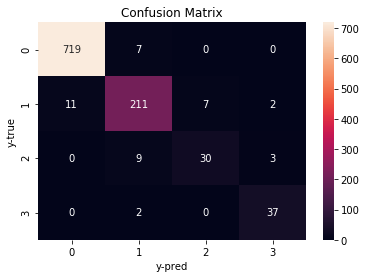

In [14]:
arr = confusion_matrix(y_test,y_pred)
sns.heatmap(arr,xticklabels=True,yticklabels=True,annot=True,fmt=".4g",)
plt.title("Confusion Matrix")
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.show()


In [15]:
# Accuracy via Confusion Matrix
arr = np.array(arr)

# Accuray 
acc = np.sum(arr.diagonal())/np.sum(arr)
print(f"Model accuracy (Confusion Matrix) : {acc}")

Model accuracy (Confusion Matrix) : 0.9605009633911368


In [16]:
#F-Score Metric
print("F-Score Metric : ")
print(classification_report(y_test,y_pred,target_names=["unacc","acc","good","vgood"]))


F-Score Metric : 
              precision    recall  f1-score   support

       unacc       0.98      0.99      0.99       726
         acc       0.92      0.91      0.92       231
        good       0.81      0.71      0.76        42
       vgood       0.88      0.95      0.91        39

    accuracy                           0.96      1038
   macro avg       0.90      0.89      0.89      1038
weighted avg       0.96      0.96      0.96      1038



In [17]:
def Process(iters,criterion,train_split):
    avg_acc_cm=0 # cummulative Accuracy ( Confusion Matrix)
    avg_acc_fs=0 # cummulative Accuracy (F-Score)
    for _ in range(iters):
        x_train,x_test,y_train,y_test = split(data,train_split)
        tree = DecisionTreeClassifier(criterion=criterion,random_state=0)
        reg = tree.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        arr = confusion_matrix(y_test,y_pred)
        
        if(iters==1):
            sns.heatmap(arr,xticklabels=False,yticklabels=False,annot=True,fmt=".4g",)
            plt.xlabel("y-pred")
            plt.ylabel("y-true")
            plt.title("Confusion Matrix")
            plt.show()
            
        arr = np.array(arr)
        acc = np.sum(arr.diagonal())/np.sum(arr)
        avg_acc_cm+=acc
        if(iters==1):
            # F-Score Metric
            print("F-Score Metric : ")
            print(classification_report(y_test,y_pred,target_names=["unacc","acc","good","vgood"]))

        avg_acc_fs+=f1_score(y_test,y_pred,average="macro")
    avg_acc_cm/=iters
    avg_acc_fs/=iters
    
    return avg_acc_cm,avg_acc_fs

In [19]:
avg_cm,avg_fs = Process(20,"entropy",0.4)
print(f"Average Confusion Matrix accuracy with Entropy : {round(avg_cm*100,2)}%")
print(f"Average F Score accuracy with Entropy: {round(avg_fs*100,2)}%")

Average Confusion Matrix accuracy with Entropy : 97.08%
Average F Score accuracy with Entropy: 93.0%


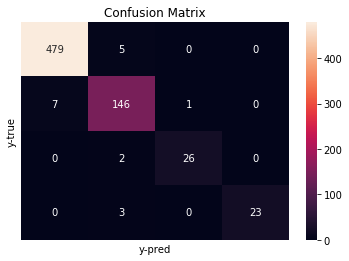

F-Score Metric : 
              precision    recall  f1-score   support

       unacc       0.99      0.99      0.99       484
         acc       0.94      0.95      0.94       154
        good       0.96      0.93      0.95        28
       vgood       1.00      0.88      0.94        26

    accuracy                           0.97       692
   macro avg       0.97      0.94      0.95       692
weighted avg       0.97      0.97      0.97       692

Confusion Matrix accuracy with Gini : 97.4%
F Score accuracy with Gini: 95.34%


In [20]:
avg_cm,avg_fs = Process(1,"gini",0.4)
print(f"Confusion Matrix accuracy with Gini : {round(avg_cm*100,2)}%")
print(f"F Score accuracy with Gini: {round(avg_fs*100,2)}%")

In [21]:
avg_cm,avg_fs = Process(20,"gini",0.4)
print(f"Average Confusion Matrix accuracy with Gini : {round(avg_cm*100,2)}%")
print(f"Average F Score accuracy with Gini: {round(avg_fs*100,2)}%")

Average Confusion Matrix accuracy with Gini : 97.2%
Average F Score accuracy with Gini: 93.07%


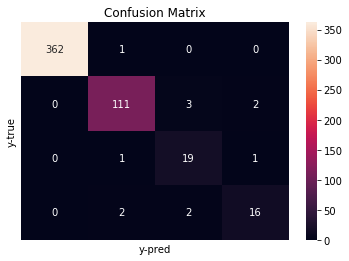

F-Score Metric : 
              precision    recall  f1-score   support

       unacc       1.00      1.00      1.00       363
         acc       0.97      0.96      0.96       116
        good       0.79      0.90      0.84        21
       vgood       0.84      0.80      0.82        20

    accuracy                           0.98       520
   macro avg       0.90      0.91      0.91       520
weighted avg       0.98      0.98      0.98       520

Confusion Matrix accuracy with Entropy : 97.69%
F Score accuracy with Entropy: 90.62%


In [22]:
avg_cm,avg_fs = Process(1,"entropy",0.3)
print(f"Confusion Matrix accuracy with Entropy : {round(avg_cm*100,2)}%")
print(f"F Score accuracy with Entropy: {round(avg_fs*100,2)}%")

In [23]:
avg_cm,avg_fs = Process(20,"entropy",0.3)
print(f"Average Confusion Matrix accuracy with Entropy : {round(avg_cm*100,2)}%")
print(f"Average F Score accuracy with Entropy: {round(avg_fs*100,2)}%")

Average Confusion Matrix accuracy with Entropy : 97.53%
Average F Score accuracy with Entropy: 94.07%


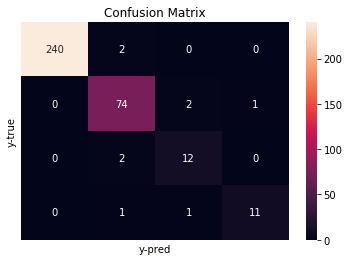

F-Score Metric : 
              precision    recall  f1-score   support

       unacc       1.00      0.99      1.00       242
         acc       0.94      0.96      0.95        77
        good       0.80      0.86      0.83        14
       vgood       0.92      0.85      0.88        13

    accuracy                           0.97       346
   macro avg       0.91      0.91      0.91       346
weighted avg       0.97      0.97      0.97       346

Confusion Matrix accuracy with Entropy : 97.4%
F Score accuracy with Entropy: 91.3%


In [24]:
avg_cm,avg_fs = Process(1,"entropy",0.2)
print(f"Confusion Matrix accuracy with Entropy : {round(avg_cm*100,2)}%")
print(f"F Score accuracy with Entropy: {round(avg_fs*100,2)}%")

In [25]:
avg_cm,avg_fs = Process(20,"entropy",0.2)
print(f"Average Confusion Matrix accuracy with Entropy : {round(avg_cm*100,2)}%")
print(f"Average F Score accuracy with Entropy: {round(avg_fs*100,2)}%")

Average Confusion Matrix accuracy with Entropy : 97.8%
Average F Score accuracy with Entropy: 94.87%


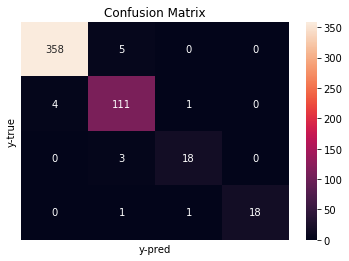

F-Score Metric : 
              precision    recall  f1-score   support

       unacc       0.99      0.99      0.99       363
         acc       0.93      0.96      0.94       116
        good       0.90      0.86      0.88        21
       vgood       1.00      0.90      0.95        20

    accuracy                           0.97       520
   macro avg       0.95      0.93      0.94       520
weighted avg       0.97      0.97      0.97       520

Confusion Matrix accuracy with Gini : 97.12%
F Score accuracy with Gini: 93.84%


In [26]:
avg_cm,avg_fs = Process(1,"gini",0.3)
print(f"Confusion Matrix accuracy with Gini : {round(avg_cm*100,2)}%")
print(f"F Score accuracy with Gini: {round(avg_fs*100,2)}%")

In [27]:
avg_cm,avg_fs = Process(20,"gini",0.3)
print(f"Average Confusion Matrix accuracy with Gini : {round(avg_cm*100,2)}%")
print(f"Average F Score accuracy with Gini: {round(avg_fs*100,2)}%")

Average Confusion Matrix accuracy with Gini : 97.59%
Average F Score accuracy with Gini: 94.36%


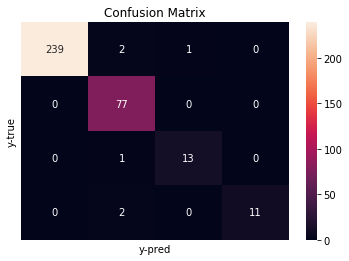

F-Score Metric : 
              precision    recall  f1-score   support

       unacc       1.00      0.99      0.99       242
         acc       0.94      1.00      0.97        77
        good       0.93      0.93      0.93        14
       vgood       1.00      0.85      0.92        13

    accuracy                           0.98       346
   macro avg       0.97      0.94      0.95       346
weighted avg       0.98      0.98      0.98       346

Confusion Matrix accuracy with Gini : 98.27%
F Score accuracy with Gini: 95.19%


In [28]:
avg_cm,avg_fs = Process(1,"gini",0.2)
print(f"Confusion Matrix accuracy with Gini : {round(avg_cm*100,2)}%")
print(f"F Score accuracy with Gini: {round(avg_fs*100,2)}%")

In [30]:
avg_cm,avg_fs = Process(20,"gini",0.2)
print(f"Average Confusion Matrix accuracy with Gini : {round(avg_cm*100,2)}%")
print(f"Average F Score accuracy with Gini: {round(avg_fs*100,2)}%")

Average Confusion Matrix accuracy with Gini : 97.8%
Average F Score accuracy with Gini: 95.31%


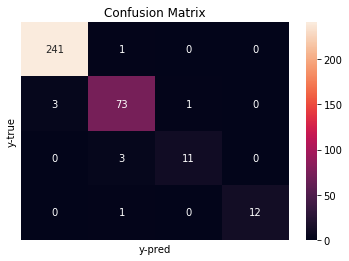

F-Score Metric : 
              precision    recall  f1-score   support

       unacc       0.99      1.00      0.99       242
         acc       0.94      0.95      0.94        77
        good       0.92      0.79      0.85        14
       vgood       1.00      0.92      0.96        13

    accuracy                           0.97       346
   macro avg       0.96      0.91      0.93       346
weighted avg       0.97      0.97      0.97       346

Confusion Matrix accuracy with Gini : 97.4%
F Score accuracy with Gini: 93.5%


In [31]:
avg_cm,avg_fs = Process(1,"gini",0.2)
print(f"Confusion Matrix accuracy with Gini : {round(avg_cm*100,2)}%")
print(f"F Score accuracy with Gini: {round(avg_fs*100,2)}%")

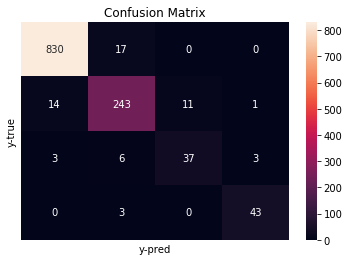

F-Score Metric : 
              precision    recall  f1-score   support

       unacc       0.98      0.98      0.98       847
         acc       0.90      0.90      0.90       269
        good       0.77      0.76      0.76        49
       vgood       0.91      0.93      0.92        46

    accuracy                           0.95      1211
   macro avg       0.89      0.89      0.89      1211
weighted avg       0.95      0.95      0.95      1211

Confusion Matrix accuracy with Gini : 95.21%
F Score accuracy with Gini: 89.27%


In [32]:
avg_cm,avg_fs = Process(1,"gini",0.7)
print(f"Confusion Matrix accuracy with Gini : {round(avg_cm*100,2)}%")
print(f"F Score accuracy with Gini: {round(avg_fs*100,2)}%")